# Hierarchical clustering by Paris

This notebook illustrates the hierarchical clustering of graphs by the [Paris algorithm](https://scikit-network.readthedocs.io/en/latest/reference/hierarchy.html).

In [1]:
import numpy as np

In [2]:
import sknetwork as skn

**Loading**

In [3]:
adjacency = skn.toy_graphs.karate_club()

**Clustering**

In [4]:
paris = skn.hierarchy.Paris('python')

In [5]:
paris.fit(adjacency)

Paris(engine='python')

In [6]:
dendrogram = paris.dendrogram_

**Visualization**

In [7]:
from scipy.cluster.hierarchy import dendrogram as show_dendrogram

In [8]:
# Warning: If the image does not appear, run the cell again.
show_ = show_dendrogram(dendrogram)

**Cuts of the dendrogram**

In [9]:
# default = 2 clusters
labels = skn.hierarchy.straight_cut(dendrogram)
print(labels)

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [10]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1] [17 17]


In [11]:
# cut with 4 clusters
labels = skn.hierarchy.straight_cut(dendrogram, n_clusters = 4)
print(labels)

[0 0 0 0 3 3 3 0 1 0 3 0 0 0 1 1 3 0 1 0 1 0 1 2 2 2 2 2 2 2 1 2 1 1]


In [12]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1 2 3] [12  9  8  5]


**Visualization**

In [13]:
from networkx import from_scipy_sparse_matrix, draw

In [14]:
graph = from_scipy_sparse_matrix(adjacency)

In [15]:
colors = ['r','g','b','c','m','y']

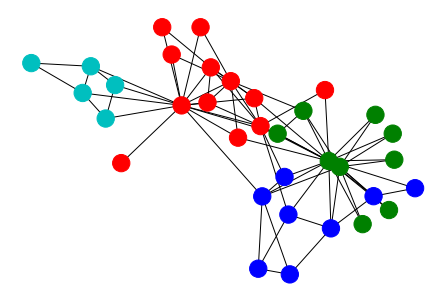

In [17]:
# Warning: If the image does not appear, run the cell again.
draw(graph, node_color=[colors[labels[i]] for i in graph])

**Metrics**

In [18]:
skn.hierarchy.dasgupta_cost(adjacency, dendrogram)

0.33333333333333326

In [19]:
skn.hierarchy.tree_sampling_divergence(adjacency, dendrogram)

0.6514659468650328

**Parameters**

In [20]:
# default engine = numba if available
paris = skn.hierarchy.Paris()
paris.fit(adjacency)

Paris(engine='numba')